<a href="https://colab.research.google.com/github/czapata-ande/ai-frameworks/blob/main/Copia_de_RPredicSTProfetCmetricDemEspa_R_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘tensorA’, ‘distributional’, ‘TTR’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘quadprog’, ‘quantmod’, ‘inline’, ‘gridExtra’, ‘loo’, ‘QuickJSR’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘dygraphs’, ‘extraDistr’, ‘RcppParallel’, ‘rstan’, ‘rstantools’, ‘StanHeaders’, ‘xts’, ‘BH’, ‘RcppEigen’


Loading required package: Rcpp

Loading required package: rlang


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.



,ds,trend,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_lower,yhat_upper,trend_lower,trend_upper,yhat
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-01-01 00:00:00,25359.07,-1872.487,-1872.487,-1872.487,-2408.824,-2408.824,-2408.824,536.3371,536.3371,536.3371,0,0,0,18530.77,28836.27,25359.07,25359.07,23486.59
2,2015-01-01 01:00:00,25374.74,-3646.097,-3646.097,-3646.097,-4178.831,-4178.831,-4178.831,532.7336,532.7336,532.7336,0,0,0,16679.70,27153.41,25374.74,25374.74,21728.64
3,2015-01-01 02:00:00,25390.40,-4842.763,-4842.763,-4842.763,-5371.587,-5371.587,-5371.587,528.8234,528.8234,528.8234,0,0,0,15286.65,25467.43,25390.40,25390.40,20547.63
4,2015-01-01 03:00:00,25406.06,-5531.205,-5531.205,-5531.205,-6055.999,-6055.999,-6055.999,524.7942,524.7942,524.7942,0,0,0,14929.07,25032.57,25406.06,25406.06,19874.85
5,2015-01-01 04:00:00,25421.72,-5669.805,-5669.805,-5669.805,-6190.656,-6190.656,-6190.656,520.8508,520.8508,520.8508,0,0,0,14160.06,25384.95,25421.72,25421.72,19751.91
6,2015-01-01 05:00:00,25437.38,-5053.462,-5053.462,-5053.462,-5570.673,-5570.673,-5570.673,517.2110,517.2110,517.2110,0,0,0,15227.66,25509.95,25437.38,25437.38,20383.92


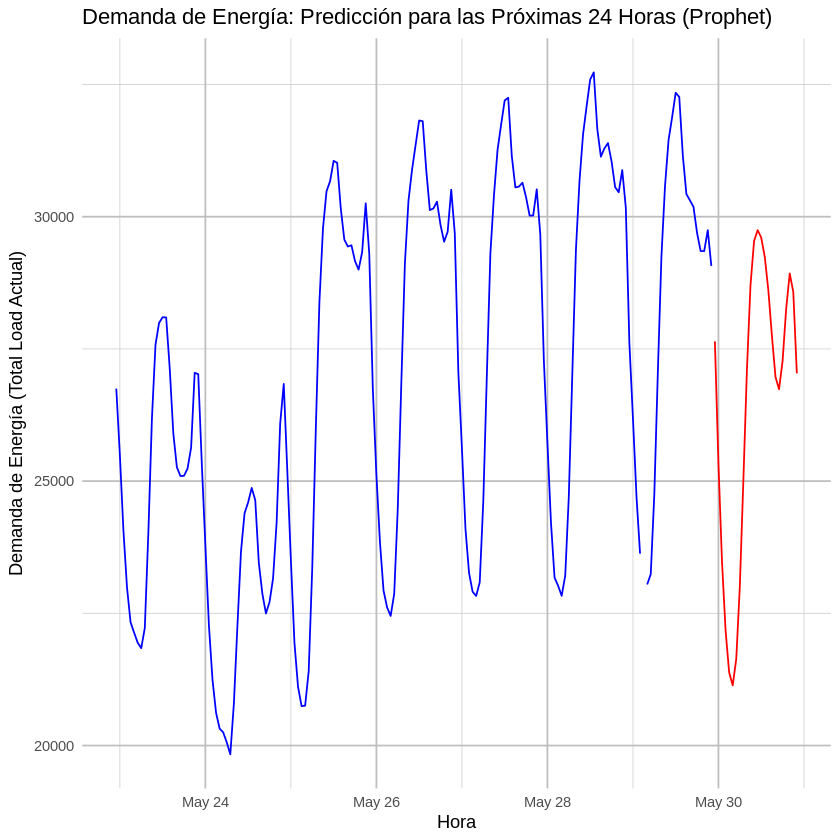

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following object is masked from ‘package:rlang’:

    ll




Métricas de Evaluación (Prophet):
RMSE: 2292.705 
MSE: 5256498 
MAE: 2189.867 
R2: 0.943456 


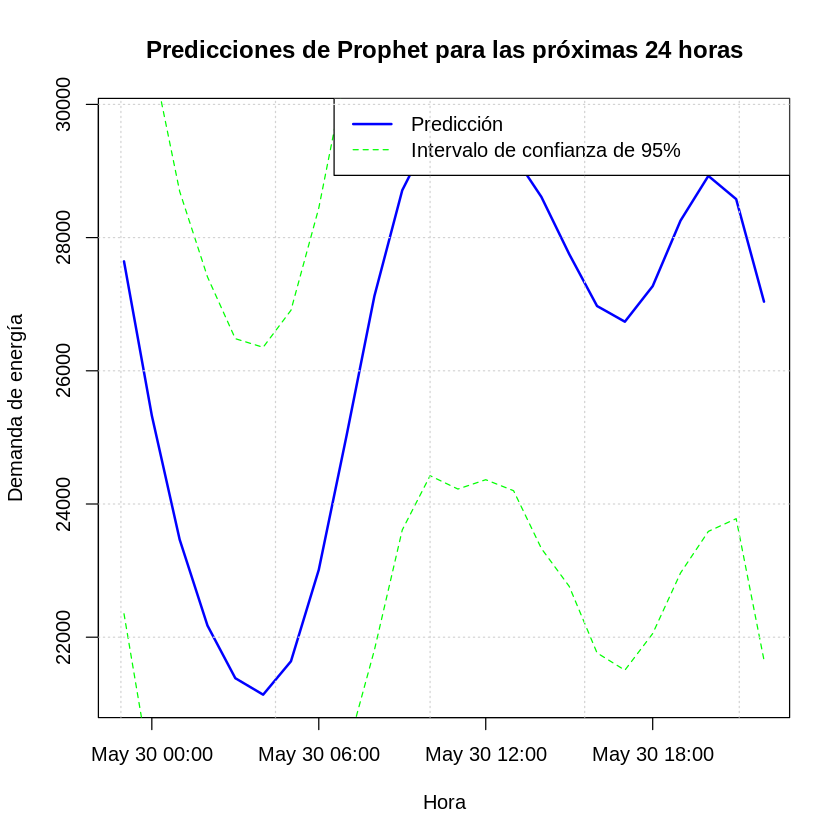

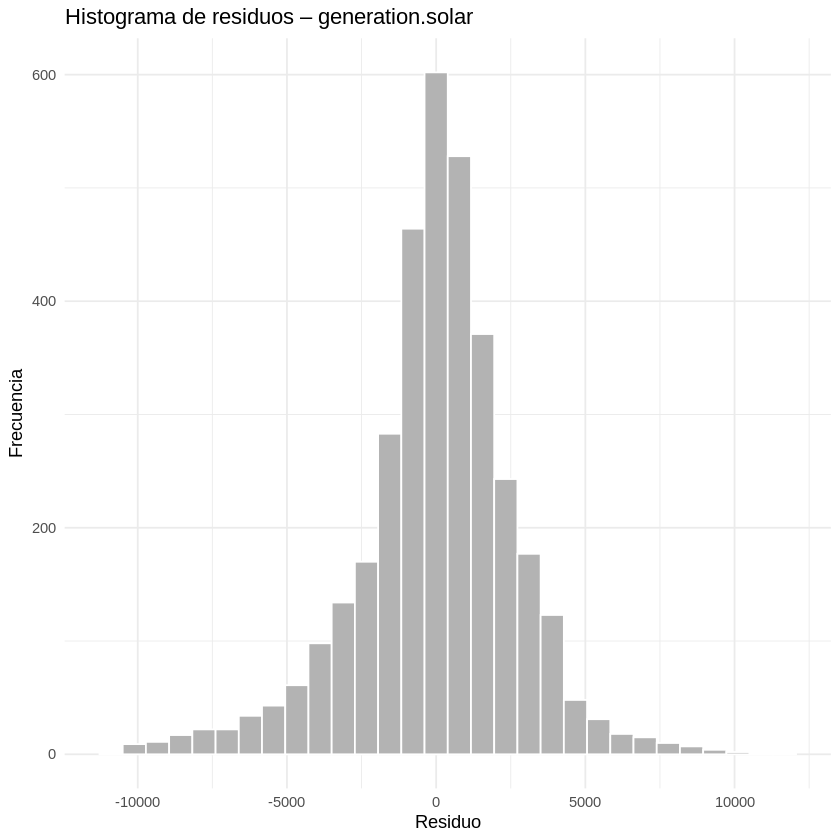

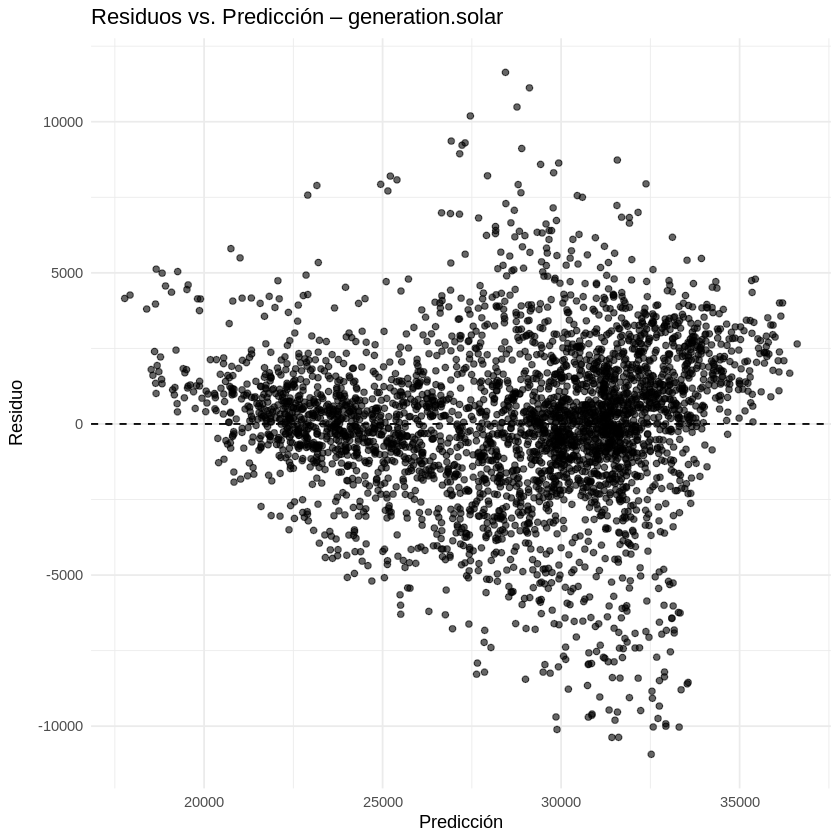

In [1]:
# ADVERTENCIA: Si va ejecutarlo en el Colab, cambie el Ambiente de Ejecución para R
# Instalar las librerías necesarias (si no están instaladas)
install.packages(c("forecast", "prophet", "dplyr")) # Install if needed

# Librerías necesarias
library(prophet)
library(ggplot2)
library(dplyr) # Added dplyr based on install suggestion

# Leer y preparar los datos desde la URL
url1 <- "https://raw.githubusercontent.com/vneumannufprbr/TrabajosRStudio/main/energy_dataset.csv" # Dataset con 3.500 instancias
 data<- read.csv(url1, stringsAsFactors = FALSE)

#url <-  "https://raw.githubusercontent.com/vneumannufprbr/Series-Temporales/main/energy_dataset.csv" # Dataset con 35.000 instancias
#data <- read.csv(url) # Dataset con 35.000 instancias # dtype=dtype_dict,

# Leer los datos desde el computador
# data <- read.csv("Practica-Prediccion-Series-Temporales/energy_dataset.csv")

# Convertir la columna de tiempo al formato adecuado
data$time <- as.POSIXct(data$time, format="%Y-%m-%d %H:%M:%S", tz="UTC")

# Renombrar columnas para adecuarse al formato de Prophet
prophet_data <- data.frame(ds = data$time, y = data$total.load.actual)

# Eliminar filas con valores nulos
prophet_data <- na.omit(prophet_data)

# Ajustar el modelo Prophet
model <- prophet(prophet_data,interval.width = 0.95)

# Crear un dataframe para las próximas 24 horas
future <- make_future_dataframe(model, periods = 24, freq = "hour")

# Hacer las predicciones para las próximas 24 horas
forecast_prophet <- predict(model, future)

# Mostrar las primeras filas de las predicciones
head(forecast_prophet)

# Filtrar las predicciones para las próximas 24 horas
next_24_hours <- tail(forecast_prophet, 24)

# Crear dataframe para graficar las predicciones
df_forecast_prophet <- data.frame(
  time = next_24_hours$ds,
  total.load.actual = next_24_hours$yhat
)

# Graficar los últimos 7 días de datos históricos y las predicciones para las próximas 24 horas
ggplot() +
  geom_line(data = tail(data, 7*24), aes(x = time, y = total.load.actual), color = "blue") +  # Últimos 7 días de datos históricos
  geom_line(data = df_forecast_prophet, aes(x = time, y = total.load.actual), color = "red") +  # Predicciones de 24 horas
  labs(title = "Demanda de Energía: Predicción para las Próximas 24 Horas (Prophet)",
       x = "Hora", y = "Demanda de Energía (Total Load Actual)") +
  theme_minimal() + # Apply theme here
  theme(panel.grid.major = element_line(color = "grey", linewidth = 0.5),  # Personalizar la cuadrícula, use linewidth
        panel.grid.minor = element_line(color = "lightgrey", linewidth = 0.25))  # Cuadrícula menor, use linewidth


# Visualizar las predicciones con Intervalo de confianza para las próximas 24 horas
plot(next_24_hours$ds, next_24_hours$yhat, type = "l", col = "blue", lwd = 2,
     xlab = "Hora", ylab = "Demanda de energía",
     main = "Predicciones de Prophet para las próximas 24 horas")
lines(next_24_hours$ds, next_24_hours$yhat_lower, col = "green", lty = 2)
lines(next_24_hours$ds, next_24_hours$yhat_upper, col = "green", lty = 2)
legend("topright", legend = c("Predicción", "Intervalo de confianza de 95%"),
       col = c("blue", "green"), lty = c(1, 2), lwd = c(2, 1))
grid()

# Extraer los valores reales para el período de predicción (las últimas 24 horas de los datos históricos)
historical_actual_prophet <- tail(prophet_data$y, 24)

# Extraer los valores predichos de las predicciones de Prophet
forecasted_values_prophet <- tail(forecast_prophet$yhat, 24)

# Instalar el paquete Metrics si no está instalado
if (!requireNamespace("Metrics", quietly = TRUE)) {
  install.packages("Metrics")
}
#CALCULO DE METRICAS
# Cargar el paquete Metrics
library(Metrics)

# Verificar que las longitudes coincidan
if (length(historical_actual_prophet) == length(forecasted_values_prophet)) {
  # Calcular las métricas de evaluación para Prophet
  rmse_prophet <- Metrics::rmse(historical_actual_prophet, forecasted_values_prophet)
  mse_prophet <- Metrics::mse(historical_actual_prophet, forecasted_values_prophet)
  mae_prophet <- Metrics::mae(historical_actual_prophet, forecasted_values_prophet)
  # Calcular R2 para Prophet
  r2_prophet <- cor(historical_actual_prophet, forecasted_values_prophet)^2

  # Imprimir los resultados
  cat("Métricas de Evaluación (Prophet):\n")
  cat("RMSE:", rmse_prophet, "\n")
  cat("MSE:", mse_prophet, "\n")
  cat("MAE:", mae_prophet, "\n")
  cat("R2:", r2_prophet, "\n")
} else {
  cat("Error: Las longitudes de los datos históricos y las predicciones de Prophet no coinciden para la evaluación.\n")
  cat("Longitud de datos históricos:", length(historical_actual_prophet), "\n")
  cat("Longitud de predicciones de Prophet:", length(forecasted_values_prophet), "\n")
}

# Gráficos de Residuos
library(dplyr)
library(ggplot2)

# Predicciones sobre TODO el histórico (mismo modelo ya entrenado)
# Ensure the ds column is in the correct format and handle NAs before prediction
hist_future <- data.frame(ds = as.POSIXct(prophet_data$ds, format="%Y-%m-%d %H:%M:%S", tz="UTC")) # Create a dataframe with ds column and ensure format
hist_future <- hist_future %>% filter(!is.na(ds)) # Remove rows with NA in ds

hist_forecast <- predict(model, hist_future)

# Unimos y calculamos residuos
df_res <- prophet_data %>%
  left_join(hist_forecast %>% select(ds, yhat), by = "ds") %>%
  mutate(
    pred  = yhat,
    resid = y - yhat
  ) %>%
  filter(is.finite(resid), is.finite(pred))

# --- Gráficos ---
# Histograma
ggplot(df_res, aes(x = resid)) +
  geom_histogram(bins = 30, fill = "gray70", color = "white") +
  labs(title = "Histograma de residuos – generation.solar",
       x = "Residuo", y = "Frecuencia") +
  theme_minimal()

# Dispersión residuos vs predicho
ggplot(df_res, aes(x = pred, y = resid)) +
  geom_point(alpha = 0.6) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Residuos vs. Predicción – generation.solar",
       x = "Predicción", y = "Residuo") +
  theme_minimal()

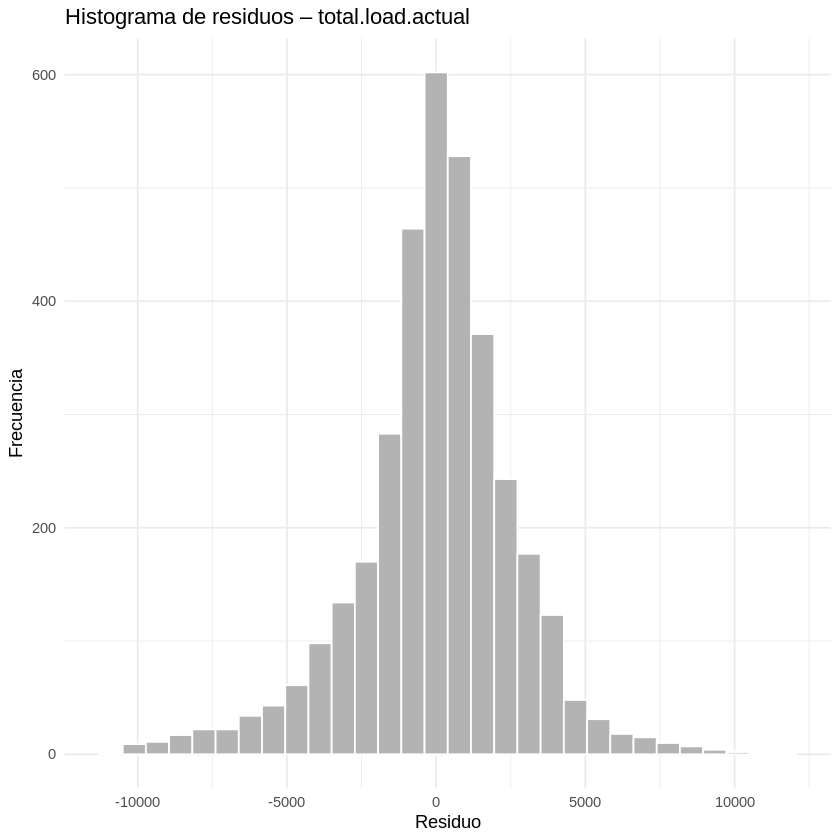

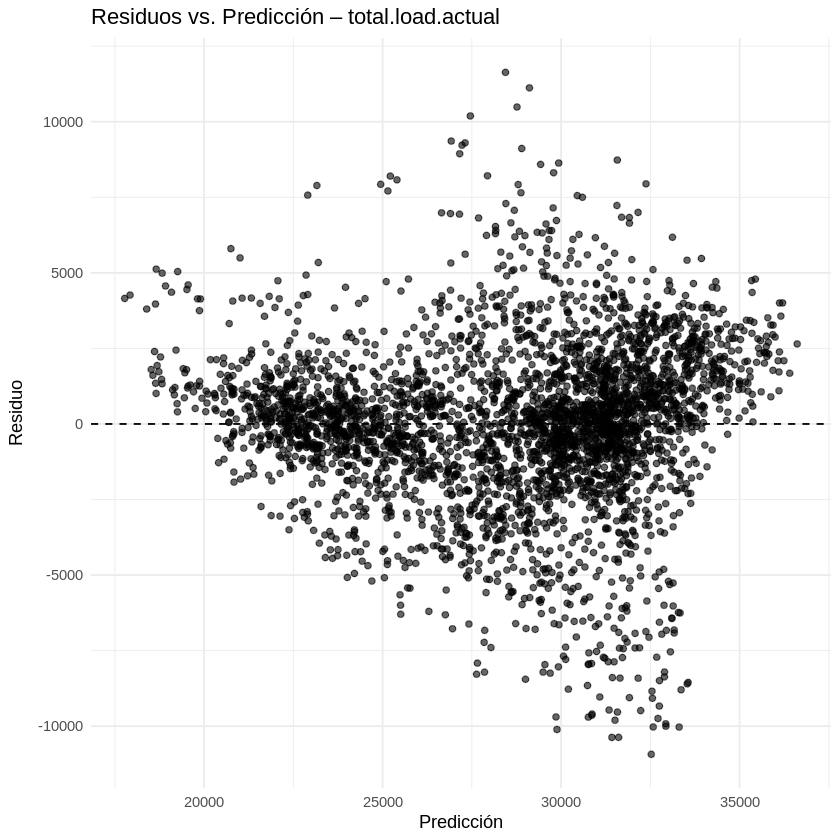

In [2]:
# --- Gráficos ---
# Histograma
ggplot(df_res, aes(x = resid)) +
  geom_histogram(bins = 30, fill = "gray70", color = "white") +
  labs(title = "Histograma de residuos – total.load.actual",
       x = "Residuo", y = "Frecuencia") +
  theme_minimal()

# Dispersión residuos vs predicho
ggplot(df_res, aes(x = pred, y = resid)) +
  geom_point(alpha = 0.6) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Residuos vs. Predicción – total.load.actual",
       x = "Predicción", y = "Residuo") +
  theme_minimal()